In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
from sklearn.decomposition import PCA

In [49]:
df = pd.read_csv('../data/crawler/unified-events-statistics-with-kills.csv')
df2023 = pd.read_csv('../data/crawler/unified-events-statistics-with-kills-2023.csv')

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3170: DtypeWarning:

Columns (116,117,118,119,120,121,122,123,124,125,126,127) have mixed types.Specify dtype option on import or set low_memory=False.



In [50]:
df.head()
def qtd_eventos(integer):
    return int((400 - integer) / 2)

qtd_eventos = list(map(qtd_eventos, df.isnull().sum(axis=1).tolist()))
df['qtd_eventos'] = qtd_eventos
df = df.replace([
    'BLUE: kill',
    'BLUE: plate',
    'BLUE: first_blood',
    'BLUE: dragon',
    'BLUE: herald',
    'BLUE: voidgrub',
    'BLUE: first_tower_top',
    'BLUE: first_tower_mid',
    'BLUE: first_tower_bot',
    'BLUE: second_tower_top',
    'BLUE: second_tower_mid',
    'BLUE: second_tower_bot',
    'BLUE: third_tower_top',
    'BLUE: third_tower_mid',
    'BLUE: third_tower_bot',
    'BLUE: inhibitor_top',
    'BLUE: inhibitor_mid',
    'BLUE: inhibitor_bot',
    'BLUE: baron',
    'BLUE: elder_dragon',
    'BLUE: nexus_tower',
    'BLUE: nexus',
    'RED: kill',
    'RED: plate',
    'RED: first_blood',
    'RED: dragon',
    'RED: herald',
    'RED: voidgrub',
    'RED: first_tower_top',
    'RED: first_tower_mid',
    'RED: first_tower_bot',
    'RED: second_tower_top',
    'RED: second_tower_mid',
    'RED: second_tower_bot',
    'RED: third_tower_top',
    'RED: third_tower_mid',
    'RED: third_tower_bot',
    'RED: inhibitor_top',
    'RED: inhibitor_mid',
    'RED: inhibitor_bot',
    'RED: baron',
    'RED: elder_dragon',
    'RED: nexus_tower',
    'RED: nexus'], range(1,45))

df = df.drop(['game','blueTopChampion','blueJungleChampion','blueMidChampion','blueADCChampion','blueSupportChampion','redTopChampion','redJungleChampion','redMidChampion','redAdcChampion','redSupportChampion'],axis=1)
df = df.fillna(0)
df = df.astype(int)

In [51]:
df2023.head()
def qtd_eventos(integer):
    return int((400 - integer) / 2)

qtd_eventos = list(map(qtd_eventos, df2023.isnull().sum(axis=1).tolist()))
df2023['qtd_eventos'] = qtd_eventos
df2023 = df2023.replace([
    'BLUE: kill',
    'BLUE: plate',
    'BLUE: first_blood',
    'BLUE: dragon',
    'BLUE: herald',
    'BLUE: first_tower_top',
    'BLUE: first_tower_mid',
    'BLUE: first_tower_bot',
    'BLUE: second_tower_top',
    'BLUE: second_tower_mid',
    'BLUE: second_tower_bot',
    'BLUE: third_tower_top',
    'BLUE: third_tower_mid',
    'BLUE: third_tower_bot',
    'BLUE: inhibitor_top',
    'BLUE: inhibitor_mid',
    'BLUE: inhibitor_bot',
    'BLUE: baron',
    'BLUE: elder_dragon',
    'BLUE: nexus_tower',
    'BLUE: nexus',
    'RED: kill',
    'RED: plate',
    'RED: first_blood',
    'RED: dragon',
    'RED: herald',
    'RED: first_tower_top',
    'RED: first_tower_mid',
    'RED: first_tower_bot',
    'RED: second_tower_top',
    'RED: second_tower_mid',
    'RED: second_tower_bot',
    'RED: third_tower_top',
    'RED: third_tower_mid',
    'RED: third_tower_bot',
    'RED: inhibitor_top',
    'RED: inhibitor_mid',
    'RED: inhibitor_bot',
    'RED: baron',
    'RED: elder_dragon',
    'RED: nexus_tower',
    'RED: nexus'], range(1,43))

df2023 = df2023.drop(['game'],axis=1)
df2023 = df2023.fillna(0)
df2023 = df2023.astype(int)

In [52]:
frames = [df, df2023]
df_final = pd.concat(frames)
y = df_final['result'].copy()
X = df_final.drop(['golId','result','qtd_eventos'],axis=1)

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



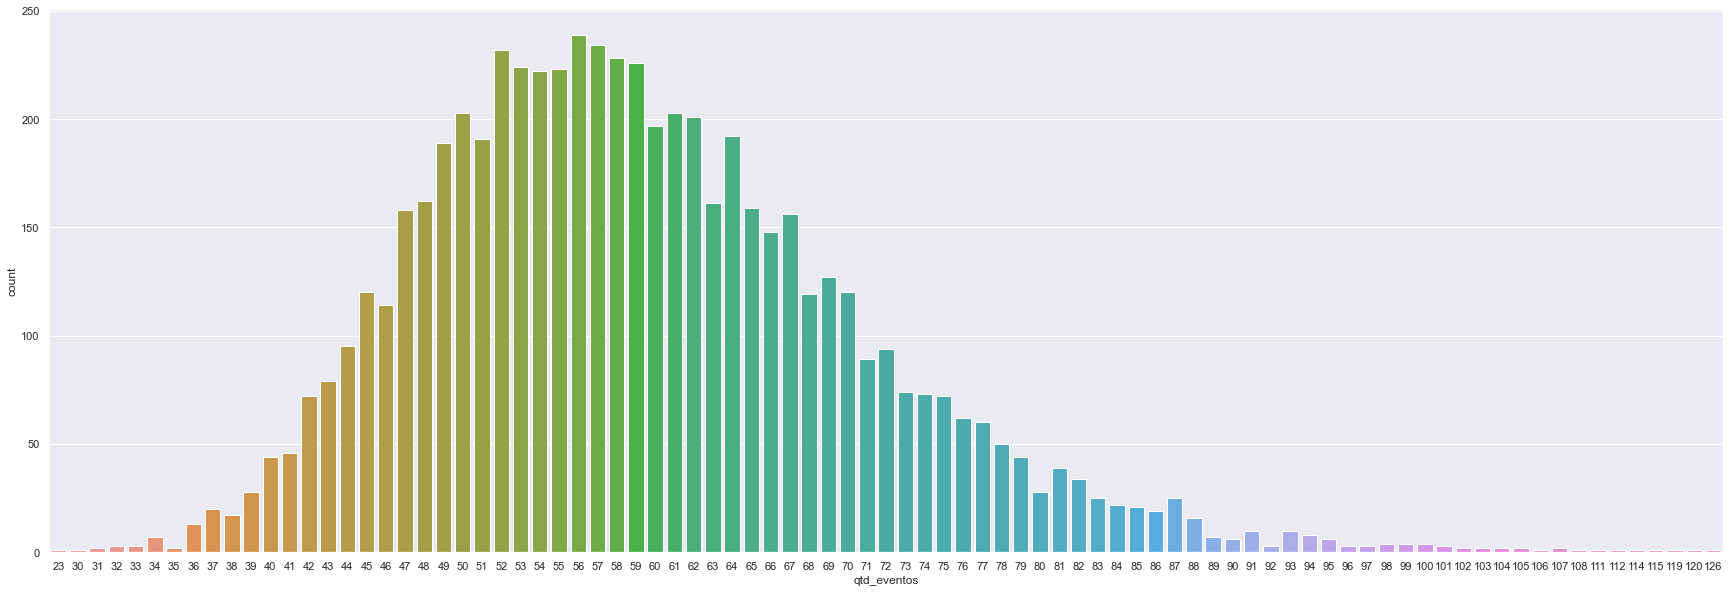

In [53]:
sns.set(rc={'figure.figsize':(30,10)})
ax = sns.countplot(df_final['qtd_eventos'])

In [54]:
"Em média as partidas tem {} eventos".format(df_final.loc[:, 'qtd_eventos'].mean())

'Em média as partidas tem 59.33949002942138 eventos'

In [55]:
len(df_final)

6118

In [56]:
pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df_final['result'])
fig.show()

In [57]:
pca = PCA(n_components=2)
pca.fit(X)
X_transformed = pca.transform(X)
new_df = pd.DataFrame(X_transformed, columns=['pc1', 'pc2'])
new_df['target'] = df_final['result']
sns.pairplot(new_df, vars=['pc1', 'pc2'],hue='target', diag_kind='hist',height=10)
plt.show()

ValueError: cannot reindex from a duplicate axis

In [ ]:
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline


pca = Pipeline([("standarize", StandardScaler()), ("pca",PCA(n_components = 3)), ("dataframe", FunctionTransformer(lambda x: pd.DataFrame(x, columns = ["First Comp", "Second Comp", "Third Comp"])))]).fit(X)
X3D = pca.transform(X)
px.scatter_3d(x = "First Comp", y = "Second Comp",z = "Third Comp", data_frame= X3D, color= y)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

fig = {
    "data": [
        {
            "x": tsne_results[:, 0],
            "y": tsne_results[:, 1],
            "mode": "markers",
            "marker": {"size": 8, "color": y}
        }
    ],
    "layout": {
        "xaxis": {"title": "x-tsne"},
        "yaxis": {"title": "y-tsne"}
    }
}

py.iplot(fig, filename="test-graph2")

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 103 nearest neighbors...
[t-SNE] Indexed 104 samples in 0.001s...
[t-SNE] Computed neighbors for 104 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 104 / 104
[t-SNE] Mean sigma: 69.521763
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.271439
[t-SNE] KL divergence after 300 iterations: 0.662834
